### Import libraries and make classification dataset

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                           n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

### Scatter plot for classification dataset

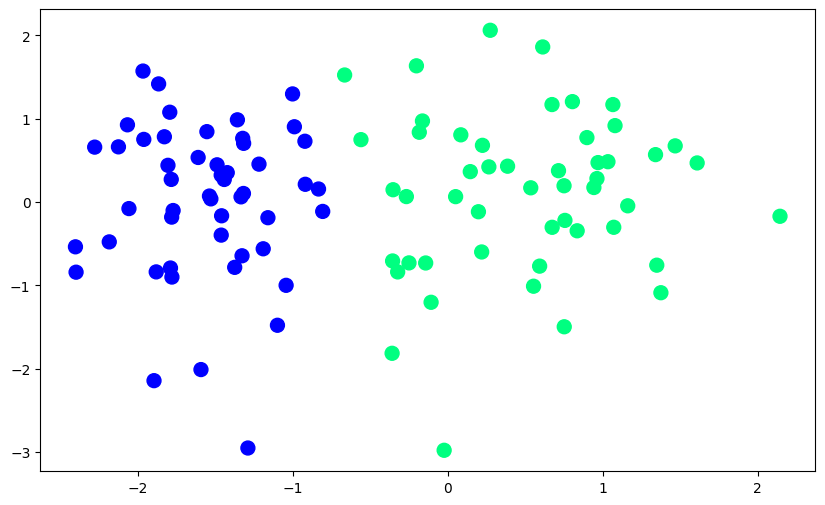

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

## Perceptron trick function
- 1. Insert constant 1 in X
- 2. Initialize weights with ones
- 3. Set learning rate
- 4. Iterate over 1000 steps
- 5. For each step, pick a random sample
- 6. Calculate y_hat
- 7. Update weights
- 8. Return intercept and coefficients


In [9]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0],weights[1:]

In [10]:
def step(z):
    return 1 if z > 0 else 0

In [11]:
intercept_,coef_ = perceptron(X,y)

In [12]:
print(coef_)
print(intercept_)

[1.38456513 0.05307781]
1.0


In [13]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [14]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

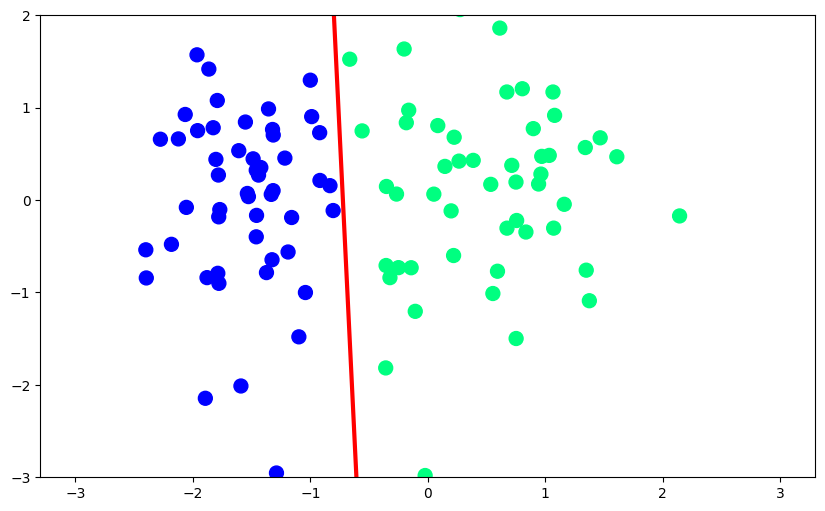

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Disadvantages of Perceptron vs. Logistic Regression:

**1. Linear Separability Limitation**

- Perceptron converges only if the data is linearly separable. If the data is not separable, it oscillates and never converges.

- Logistic Regression works well even if data is not perfectly separable by minimizing the log-loss.

**2. No Probabilistic Interpretation**

- Perceptron only gives class labels (0 or 1).

- Logistic Regression provides probabilities (using the sigmoid function), which is useful for threshold tuning and understanding confidence.

**3. Non-Optimal Decision Boundary**

- Perceptron may stop after finding any boundary, even if it’s not the best one.

- Logistic Regression optimizes the boundary using gradient descent, ensuring a better decision boundary.

**4. Sensitive to Learning Rate**

- Perceptron can struggle with convergence and is sensitive to the learning rate.

- Logistic Regression has more stable and smooth convergence.

**5. No Regularization in Perceptron**

- Logistic Regression supports regularization (L1, L2) to prevent overfitting.

- Perceptron does not have built-in regularization.

**For real-world datasets, Logistic Regression is generally preferred over Perceptron because of its robustness and better generalization.**